In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)
import seaborn as sbn

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [633]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("sample_submission.csv")

In [323]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [324]:
train['Selling_Price'].fillna(0,inplace=True)

In [295]:
train = pd.read_csv("Train.csv")
train[train['Selling_Price'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
64,NKCECW7BSTZBHH6R,2.0,2015-09-24 17:26:11.000,268,Tyrus,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,NaN
516,RNGE7M92GMQNSPUG,7.0,2015-08-15 23:12:45.000,447,Kristen,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,NaN
536,SHOEFDVVFH5WUUMN,45.0,2015-09-22 15:26:53.000,14,Olin,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,NaN
1037,PBXE8FW6ZZZF2RQA,39.0,2015-11-21 03:56:22.000,14,Giovonni,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,NaN,NaN
1105,SHIE9J6P8QHDZWXF,27.0,2015-09-23 14:25:52.000,198,Donavan,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,BRAEBMWVSDWZYNK8,30.0,2015-08-21 20:36:19.000,70,Amarion,Yes,Home_decor,2,62,0.0,214.0,11.0,989.0,4396.0,NaN
5584,CRTEB774ZFD3FGHQ,30.0,2015-09-24 15:20:13.000,268,Theodora,Yes,Pet_care,2,29,1.0,170.0,3.0,1044.0,3605.0,NaN
5992,CAGE8TQ8KFEGHY9M,47.0,2015-11-20 04:56:17.000,152,Laela,No,Child_care,0,37,0.0,338.0,5.0,9414.0,12294.0,NaN
6273,CRTECN2QVSCZAQEA,41.0,2015-09-23 16:25:49.000,268,Angus,No,Organic,2,100,0.0,117.0,6.0,424.0,2909.0,NaN


### Assumtions :

In [ ]:
1. NO of Stalls in the carnival
2. instock date
3. Market Category
4. Name of the custmers
5. Represents if a customers is a loyal customer
6. Prodcut Category - Which Category that prodcut belongs to
7. Grade- Represents the quality of the prodcut
8. Demand of the Product that being sold at the carnival
9 . Represents whether a product is being sold at a discount or not
10. Charges_1 - Type of Charges applied on the prodcut 
11. Represents the minimum price of a product
12. Represents the selling price of the product in the carnival


In [325]:
test.head(10)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244
5,ACCE558KZHEPZYMG,28.0,2016-03-18 18:16:45.000,62,Dariah,Yes,Technology,0,38,0,478.0,15.0,4545.0,13745
6,ACCEAZCVAMFHDPY7,5.0,2015-08-16 20:12:39.000,104,Felipe,Yes,Hospitality,0,58,0,215.0,14.0,2594.0,7519
7,NKCDYNY37JPBGBVM,12.0,2015-09-24 16:25:16.000,23,Hadi,No,Organic,2,31,0,122.0,7.0,959.0,3850
8,NKCEY8KWY33FCUYD,48.0,2015-11-21 07:35:44.000,24,Sapphira,Yes,Pet_care,0,69,0,106.0,9.0,6347.0,8520
9,RNGE4YPTQYRECV9J,16.0,2015-08-16 22:23:27.000,23,Mariyah,No,Repair,0,5,0,221.0,5.0,1534.0,7249


In [326]:
data = pd.concat([train,test])

In [9]:
train.shape, test.shape

((6368, 15), (3430, 14))

In [7]:
data.shape

(9798, 15)

In [327]:
data.duplicated().sum()

0

In [328]:
data = data.reset_index().drop(columns="index")

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        9798 non-null   object 
 1   Stall_no          9792 non-null   float64
 2   instock_date      9798 non-null   object 
 3   Market_Category   9798 non-null   int64  
 4   Customer_name     9534 non-null   object 
 5   Loyalty_customer  9798 non-null   object 
 6   Product_Category  9798 non-null   object 
 7   Grade             9798 non-null   int64  
 8   Demand            9798 non-null   int64  
 9   Discount_avail    9760 non-null   float64
 10  charges_1         9564 non-null   float64
 11  charges_2 (%)     9588 non-null   float64
 12  Minimum_price     9746 non-null   float64
 13  Maximum_price     9455 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.1+ MB


In [330]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Stall_no,9792.0,25.422896,14.350386,1.00,13.000000,25.0000,38.000000,50.000000
Market_Category,9798.0,198.414064,169.767862,0.00,55.000000,129.0000,389.000000,471.000000
Grade,9798.0,0.652072,1.032439,0.00,0.000000,0.0000,2.000000,3.000000
Demand,9798.0,50.569810,28.918744,1.00,26.000000,50.0000,76.000000,100.000000
Discount_avail,9760.0,0.142520,0.349601,0.00,0.000000,0.0000,0.000000,1.000000
charges_1,9564.0,264.858637,124.776966,100.00,163.000000,252.0000,316.250000,649.000000
charges_2 (%),9588.0,10.249791,4.289862,1.00,7.000000,10.0000,14.000000,17.000000
Minimum_price,9746.0,3500.805664,2189.309453,1.00,1862.000000,3124.0000,4668.000000,17580.000000
Maximum_price,9455.0,6360.541830,3666.985837,163.00,3878.000000,5557.0000,8003.500000,58812.000000
Selling_Price,6368.0,4533.862418,2991.843456,-6062.47,2392.532512,4188.4524,6156.039923,22638.325941


In [331]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        38
charges_1            234
charges_2 (%)        210
Minimum_price         52
Maximum_price        343
Selling_Price       3430
dtype: int64

# EDA

<AxesSubplot:>

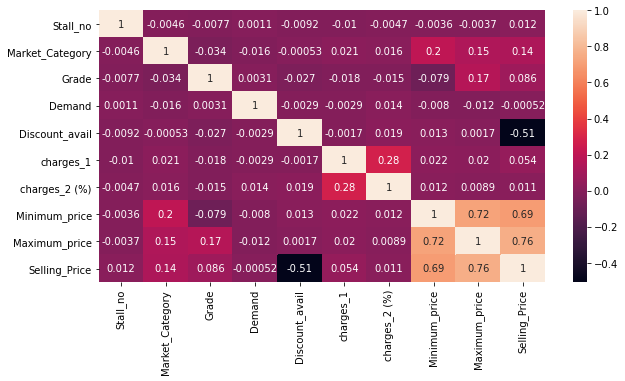

In [332]:
sbn.heatmap(data.corr(),annot=True)

In [18]:
data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [19]:
data['Grade'].unique()

array([1, 0, 2, 3])

In [20]:
data.corr()['Selling_Price']

Stall_no           0.011733
Market_Category    0.138711
Grade              0.086450
Demand            -0.000601
Discount_avail    -0.512457
charges_1          0.053045
charges_2 (%)      0.009031
Minimum_price      0.700444
Maximum_price      0.766928
Selling_Price      1.000000
Name: Selling_Price, dtype: float64

In [54]:
cat_cols = data.select_dtypes(include='number')

In [ ]:
1. 275 Prodcut Catagory 
2. 

In [56]:
for i in cat_cols:
    print("Num of Unique Value {}, Column Name {}, Column Values {} ".format(data[i].nunique(),i,data[i].unique()))

Num of Unique Value 50, Column Name Stall_no, Column Values [37. 38.  9. 50.  7. 23. 33.  4. 26.  5. 16.  1. 39. 45. 46. 15. 14. 17.
 36. 24. 10. 27. 40. 18. 32. 19. 25. 35. 29.  8. 21.  3. 42. 41. 30. 28.
 43. 20. 31.  2. 49. 22. 12. 13. 34. 11. 47.  6. 48. 44. nan] 
Num of Unique Value 275, Column Name Market_Category, Column Values [  2  24 447  23  63 162 462 156 275   3 268 188 186 358   1 294 456 137
 250 451 198 211 283 236 165 101 423  14  11 443  58  62   0  55 469 350
  27 320  38 441 235  85 230 111  65 103 110  83  93 131 452 205  60 199
  73 255  13 192 407 116  97 115  37 113 100  74  57  70   9 444 146 204
 367 114  79  80 121  39 445 459 463 454 141 216 231 124 152 471  61 234
 448 315 164 446 220 175 191 123 449 108 104 437 455  51 450 190 397  76
 453 256  94  12 173  17 403 163 167  40 149 430 179 460 458 416 150  69
  98 151  30 436 118 106 166 227 326 389 209 138 202 112 132 177  90 468
  99  36 376 144 467 147  78 249  20 224  45  87 127 105 129 214  15 210
  43 4

In [30]:
data['Stall_no'].nunique()

50

In [35]:
data['Market_Category'].unique()

array([  2,  24, 447,  23,  63, 162, 462, 156, 275,   3, 268, 188, 186,
       358,   1, 294, 456, 137, 250, 451, 198, 211, 283, 236, 165, 101,
       423,  14,  11, 443,  58,  62,   0,  55, 469, 350,  27, 320,  38,
       441, 235,  85, 230, 111,  65, 103, 110,  83,  93, 131, 452, 205,
        60, 199,  73, 255,  13, 192, 407, 116,  97, 115,  37, 113, 100,
        74,  57,  70,   9, 444, 146, 204, 367, 114,  79,  80, 121,  39,
       445, 459, 463, 454, 141, 216, 231, 124, 152, 471,  61, 234, 448,
       315, 164, 446, 220, 175, 191, 123, 449, 108, 104, 437, 455,  51,
       450, 190, 397,  76, 453, 256,  94,  12, 173,  17, 403, 163, 167,
        40, 149, 430, 179, 460, 458, 416, 150,  69,  98, 151,  30, 436,
       118, 106, 166, 227, 326, 389, 209, 138, 202, 112, 132, 177,  90,
       468,  99,  36, 376, 144, 467, 147,  78, 249,  20, 224,  45,  87,
       127, 105, 129, 214,  15, 210,  43, 457, 470,  41,  10, 168,  52,
       221, 242,  89,  68,   8,  44, 246,  18, 289,  26,   6, 18

In [57]:
data['Market_Category']

0         2
1        24
2       447
3        23
4        63
       ... 
9793     58
9794    358
9795    106
9796    104
9797    165
Name: Market_Category, Length: 9798, dtype: int64

In [69]:
def AttrPercentageBar(x, y,z,w,h):
    matplotlib.rcParams["figure.figsize"] = (w,h)
    cross = pd.crosstab(data[x],data[y])
    cross.div(cross.sum(1),axis = 0).plot(kind = "bar", stacked = z, rot=60)

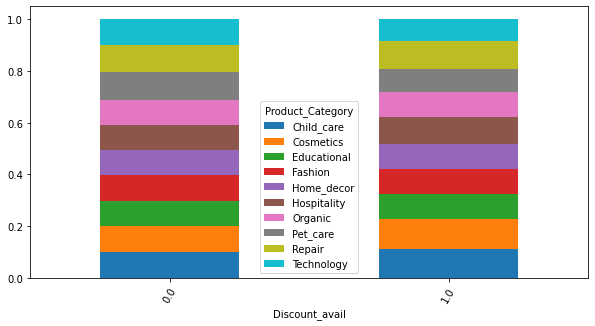

In [74]:
#AttrPercentageBar("Gender", "Work_Life_balance",True,10,5)
AttrPercentageBar('Grade','Product_Category',True,10,5)

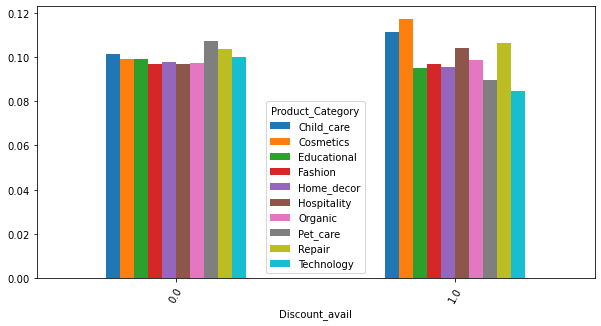

In [76]:
#AttrPercentageBar("Gender", "Work_Life_balance",True,10,5)
AttrPercentageBar('Discount_avail','Product_Category',False,10,5)

# Pre Processing

In [96]:
pd.set_option("display.max_rows", 30)

data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)        210
Minimum_price         52
Maximum_price        343
Selling_Price       3471
dtype: int64

In [103]:
data['charges_2 (%)']

0       11.0
1       12.0
2        9.0
3       13.0
4        4.0
        ... 
9793     5.0
9794     6.0
9795    17.0
9796    15.0
9797     9.0
Name: charges_2 (%), Length: 9798, dtype: float64

In [226]:
data3 = pd.concat([train,test])

In [333]:
data['charges_1'] = data['charges_1'].fillna(data['charges_1'].min())

In [334]:
data['Discount_avail'] = data['Discount_avail'].fillna(0.0)

In [ ]:
data.describe()['charges_2']

In [101]:
data[data['charges_2 (%)'].isna()].describe()['Maximum_price']

count      194.000000
mean      6015.804124
std       3065.898609
min        414.000000
25%       4025.000000
50%       5455.500000
75%       7007.250000
max      15884.000000
Name: Maximum_price, dtype: float64

In [92]:
c

count     9455.000000
mean      6360.541830
std       3666.985837
min        163.000000
25%       3878.000000
50%       5557.000000
75%       8003.500000
max      58812.000000
Name: Maximum_price, dtype: float64

In [112]:
data[data['charges_2 (%)'].notna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [105]:
data[data['charges_2 (%)'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Linda,Yes,Cosmetics,3,31,0.0,100.0,NaN,9483.0,13644.0,11761.213275
84,BRAEDSKCPTZTAU8H,50.0,2015-08-21 19:36:19.000,103,Noble,Yes,Child_care,1,17,0.0,328.0,NaN,3790.0,6945.0,5699.759967
162,BRAE3TSHYZTHHE2F,25.0,2015-08-19 19:08:07.000,452,Ira,Yes,Technology,0,30,0.0,642.0,NaN,6251.0,8802.0,8157.086175
277,WTCEGGTZEJQ2YRQG,36.0,2015-05-08 16:03:25.000,443,Frances,Yes,Home_decor,0,17,0.0,289.0,NaN,4651.0,6468.0,5856.814260
285,NKCEAX7H9SH5UZNS,12.0,2015-11-18 06:56:37.000,108,Edan,No,Fashion,0,47,0.0,387.0,NaN,2457.0,5460.0,4323.193344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,BOTEDSEN9ZSFUUAQ,43.0,2015-08-22 21:48:47.000,441,NaN,No,Organic,0,51,1.0,101.0,NaN,3851.0,5889.0,NaN
7620,BRAEDQEETE3Y2CZJ,33.0,2015-08-20 18:33:05.000,23,Haddie,No,Educational,0,78,0.0,166.0,NaN,1398.0,2551.0,NaN
8326,BRAE2NF6XGU42KGQ,48.0,2015-08-21 20:37:05.000,93,Alanis,Yes,Hospitality,1,58,0.0,346.0,NaN,2140.0,7219.0,NaN
8549,BRAECZZTSHGQZXDB,17.0,2015-08-19 20:12:54.000,80,Laniyah,No,Organic,0,22,0.0,146.0,NaN,2193.0,4657.0,NaN


In [ ]:
pd.set_option("display.max_rows", 20)

Employee_age_imputation =  data.pivot_table(values="Age", index = ["Time_of_service"])
Employee_Service_imputation =  data.pivot_table(values="Time_of_service", index = ["Age"])


In [339]:
Charges_Impute_Table =  data.pivot_table(values="charges_2 (%)",columns='Grade',index='Product_Category')

In [340]:
Charges_Impute_Table

Grade,0,1,2,3
Product_Category,,,,
Child_care,11.147937,10.535714,11.074324,10.253165
Cosmetics,14.630862,14.517241,14.514793,14.817073
Educational,10.924266,12.000000,11.081871,10.818182
Fashion,13.826421,14.157895,13.980769,13.863636
Home_decor,13.668780,13.425532,13.363095,13.382022
Hospitality,9.437500,9.288462,9.683060,9.644737
Organic,6.966614,7.288889,7.084746,7.275000
Pet_care,6.269058,5.469697,6.289773,5.715789
Repair,5.060519,4.731343,4.861635,5.153846


In [341]:
Charges_Impute_test = data[data["charges_2 (%)"].isna()].head(1)
Charges_Impute_test

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
76,ACCEHZF95ZRCKACD,7.0,2015-05-09 17:19:45.000,358,Linda,Yes,Cosmetics,3,31,0.0,100.0,NaN,9483.0,13644.0,11761.213275


In [342]:
Charges_Impute_Table.loc[Charges_Impute_test["Product_Category"], Charges_Impute_test["Grade"]]

Grade,3
Product_Category,
Cosmetics,14.817073


In [343]:
def Charges_Imputer(x):
    return Charges_Impute_Table.loc[x["Product_Category"], x["Grade"]]

In [344]:
data["charges_2 (%)"].fillna(data[data["charges_2 (%)"].isna()].apply(Charges_Imputer, axis= 1), inplace = True)

In [345]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price         52
Maximum_price        343
Selling_Price       3430
dtype: int64

In [227]:
data3["Minimum_price"].describe()

count     9746.000000
mean      3500.805664
std       2189.309453
min          1.000000
25%       1862.000000
50%       3124.000000
75%       4668.000000
max      17580.000000
Name: Minimum_price, dtype: float64

In [223]:
data["Minimum_price"].describe()

count     9798.000000
mean      3482.276898
std       2198.178168
min          1.000000
25%       1840.250000
50%       3112.000000
75%       4659.000000
max      17580.000000
Name: Minimum_price, dtype: float64

In [234]:
data.shape

(9798, 15)

In [ ]:
data.groupby('Product_Category').(data['Minimum_price']+['Maximum_price'])

In [346]:
MinPrice_Impute_Table =  data.pivot_table(values="Minimum_price",columns='Grade',index=['Product_Category'])

In [347]:
MinPrice_Impute_Table

Grade,0,1,2,3
Product_Category,,,,
Child_care,3649.479663,4685.783333,3026.258278,3468.303797
Cosmetics,3653.083700,4264.758621,2931.558140,3512.277108
Educational,3506.588415,3927.490566,2855.412791,3391.871795
Fashion,3586.926094,4666.175439,2887.265823,3621.102941
Home_decor,3708.470588,4566.708333,2578.757396,3234.206897
Hospitality,3489.941732,4250.315789,3017.661290,3281.848101
Organic,3448.814642,4769.727273,2690.717514,3389.506024
Pet_care,3602.671053,4285.227273,3258.365169,3281.600000
Repair,3501.613636,4422.119403,2964.141975,3568.737500


In [348]:
MinPrice_Impute_test = data[data["Maximum_price"].isna()].head(1)
MinPrice_Impute_test

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,100.0,11.0,786.0,NaN,2582.8605


In [ ]:
MinPrice_Impute_Table.info()

In [191]:
MinPrice_Impute_Table.loc[1:2]

Product_Category       Child_care    Cosmetics  Educational      Fashion  \
Grade Discount_avail                                                       
1     0.0             4524.980769  4338.962264  3840.608696  4750.916667   
      1.0             5731.000000  3478.200000  4498.428571  4214.222222   
2     0.0             3028.504065  2951.654135  2871.388158  3029.962406   
      1.0             3016.392857  2863.025641  2734.000000  2128.120000   

Product_Category       Home_decor  Hospitality      Organic     Pet_care  \
Grade Discount_avail                                                       
1     0.0             4491.377778  4108.942308  4438.108108  4130.423729   
      1.0             5696.666667  5720.600000  6522.571429  5590.000000   
2     0.0             2620.375839  2930.759740  2689.122581  3333.625000   
      1.0             2268.700000  3435.875000  2701.954545  2818.384615   

Product_Category           Repair   Technology  
Grade Discount_avail                            
1     0.0             4426.400000  4684.196721  
      1.0             4385.428571  5071.333333  
2     0.0             3013.481752  2875.391608  
      1.0             2693.760000  2344.722222

In [349]:
MinPrice_Impute_Table.loc[data["Product_Category"], data["Grade"]]

Grade,1,0,0,2,1,1,3,1,0,0,...,0,1,0,3,3,0,3,0,0,0
Product_Category,,,,,,,,,,,,,,,,,,,,,
Fashion,4666.175439,3586.926094,3586.926094,2887.265823,4666.175439,4666.175439,3621.102941,4666.175439,3586.926094,3586.926094,...,3586.926094,4666.175439,3586.926094,3621.102941,3621.102941,3586.926094,3621.102941,3586.926094,3586.926094,3586.926094
Fashion,4666.175439,3586.926094,3586.926094,2887.265823,4666.175439,4666.175439,3621.102941,4666.175439,3586.926094,3586.926094,...,3586.926094,4666.175439,3586.926094,3621.102941,3621.102941,3586.926094,3621.102941,3586.926094,3586.926094,3586.926094
Child_care,4685.783333,3649.479663,3649.479663,3026.258278,4685.783333,4685.783333,3468.303797,4685.783333,3649.479663,3649.479663,...,3649.479663,4685.783333,3649.479663,3468.303797,3468.303797,3649.479663,3468.303797,3649.479663,3649.479663,3649.479663
Educational,3927.490566,3506.588415,3506.588415,2855.412791,3927.490566,3927.490566,3391.871795,3927.490566,3506.588415,3506.588415,...,3506.588415,3927.490566,3506.588415,3391.871795,3391.871795,3506.588415,3391.871795,3506.588415,3506.588415,3506.588415
Repair,4422.119403,3501.613636,3501.613636,2964.141975,4422.119403,4422.119403,3568.737500,4422.119403,3501.613636,3501.613636,...,3501.613636,4422.119403,3501.613636,3568.737500,3568.737500,3501.613636,3568.737500,3501.613636,3501.613636,3501.613636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pet_care,4285.227273,3602.671053,3602.671053,3258.365169,4285.227273,4285.227273,3281.600000,4285.227273,3602.671053,3602.671053,...,3602.671053,4285.227273,3602.671053,3281.600000,3281.600000,3602.671053,3281.600000,3602.671053,3602.671053,3602.671053
Technology,4718.865672,3670.407576,3670.407576,2816.062112,4718.865672,4718.865672,3173.194030,4718.865672,3670.407576,3670.407576,...,3670.407576,4718.865672,3670.407576,3173.194030,3173.194030,3670.407576,3173.194030,3670.407576,3670.407576,3670.407576
Educational,3927.490566,3506.588415,3506.588415,2855.412791,3927.490566,3927.490566,3391.871795,3927.490566,3506.588415,3506.588415,...,3506.588415,3927.490566,3506.588415,3391.871795,3391.871795,3506.588415,3391.871795,3506.588415,3506.588415,3506.588415


In [350]:
def MinPrice_Imputer(x):
    return MinPrice_Impute_Table.loc[x["Product_Category"], x["Grade"]]

In [351]:
data["Minimum_price"].fillna(data[data["Minimum_price"].isna()].apply(MinPrice_Imputer, axis= 1), inplace = True)

In [ ]:
MinPrice_Impute_Table.loc[MinPrice_Impute_Table["Grade"], MinPrice_Impute_Table["Product_Category"]]

In [ ]:
data['CalulatedPrice']  = data['Minimum_price']  df['Maximum_price']

In [352]:
MaxPrice_Impute_Table =  data.pivot_table(values="Maximum_price",columns='Grade',index='Product_Category')

In [353]:
MaxPrice_Impute_Table

Grade,0,1,2,3
Product_Category,,,,
Child_care,6039.846715,8259.385965,6596.408163,8848.786667
Cosmetics,6270.430956,7682.666667,5978.473373,8653.903614
Educational,5820.871272,7119.137255,6135.886905,8551.310811
Fashion,6017.608150,7970.169811,6172.544872,9883.090909
Home_decor,6118.042587,7629.531915,5835.224242,9060.702381
Hospitality,5786.431373,8074.222222,6399.150000,9147.102564
Organic,5895.605723,8219.304348,5678.903955,9170.682927
Pet_care,5923.679699,7284.250000,6510.798851,8296.302083
Repair,5882.898678,8119.641791,5960.200000,9237.628205


In [354]:
MaxPrice_Impute_test = data[data["Maximum_price"].isna()].head(1)
MaxPrice_Impute_test

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
16,SHIEBKMSYJFA9XZT,14.0,2015-09-24 16:28:03.000,1,Arantxa,No,Fashion,0,74,0.0,100.0,11.0,786.0,NaN,2582.8605


In [277]:
MaxPrice_Impute_Table.loc[MaxPrice_Impute_test["Product_Category"], MaxPrice_Impute_test["Grade"]]

Grade,0
Product_Category,
Fashion,6017.60815


In [355]:
def MaxPrice_Imputer(x):
    return MaxPrice_Impute_Table.loc[x["Product_Category"], x["Grade"]]

In [356]:
data["Maximum_price"].fillna(data[data['Maximum_price'].isna()].apply(MaxPrice_Imputer, axis= 1), inplace = True)

In [ ]:
MaxPrice_Impute_Table.loc[MaxPrice_Impute_Table["Grade"], MaxPrice_Impute_Table["Product_Category"]]

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        9798 non-null   object 
 1   Stall_no          9792 non-null   float64
 2   instock_date      9798 non-null   object 
 3   Market_Category   9798 non-null   int64  
 4   Customer_name     9534 non-null   object 
 5   Loyalty_customer  9798 non-null   object 
 6   Product_Category  9798 non-null   object 
 7   Grade             9798 non-null   int64  
 8   Demand            9798 non-null   int64  
 9   Discount_avail    9798 non-null   float64
 10  charges_1         9798 non-null   float64
 11  charges_2 (%)     9798 non-null   float64
 12  Minimum_price     9798 non-null   float64
 13  Maximum_price     9798 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.1+ MB


In [358]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        264
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2 (%)          0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
dtype: int64

In [359]:
train[train['Selling_Price'] == 0]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
64,NKCECW7BSTZBHH6R,2.0,2015-09-24 17:26:11.000,268,Tyrus,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,0.0
516,RNGE7M92GMQNSPUG,7.0,2015-08-15 23:12:45.000,447,Kristen,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,0.0
536,SHOEFDVVFH5WUUMN,45.0,2015-09-22 15:26:53.000,14,Olin,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,0.0
1037,PBXE8FW6ZZZF2RQA,39.0,2015-11-21 03:56:22.000,14,Giovonni,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,NaN,0.0
1105,SHIE9J6P8QHDZWXF,27.0,2015-09-23 14:25:52.000,198,Donavan,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5343,BRAEBMWVSDWZYNK8,30.0,2015-08-21 20:36:19.000,70,Amarion,Yes,Home_decor,2,62,0.0,214.0,11.0,989.0,4396.0,0.0
5584,CRTEB774ZFD3FGHQ,30.0,2015-09-24 15:20:13.000,268,Theodora,Yes,Pet_care,2,29,1.0,170.0,3.0,1044.0,3605.0,0.0
5992,CAGE8TQ8KFEGHY9M,47.0,2015-11-20 04:56:17.000,152,Laela,No,Child_care,0,37,0.0,338.0,5.0,9414.0,12294.0,0.0
6273,CRTECN2QVSCZAQEA,41.0,2015-09-23 16:25:49.000,268,Angus,No,Organic,2,100,0.0,117.0,6.0,424.0,2909.0,0.0


In [360]:
data.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
3426,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
3427,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
3428,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [301]:
data1 = pd.concat([train,test])

In [305]:
data1 = data1.reset_index().drop(columns="index")

In [522]:
data1.shape

(9798, 15)

In [523]:
9798 - 41

9757

(9798, 19)

In [364]:
data[data['Selling_Price'] != 0]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [365]:
data_recvr = data.copy

In [ ]:
#Copying the Preprocessed data for recovery purpose
data_recvr

In [366]:
data = data[data['Selling_Price'] != 0]

In [369]:
data[data['Selling_Price'] != 0]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [376]:
data[data['Selling_Price'].isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
6368,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0.0,380.0,16.0,2576.0,3340.0,NaN
6369,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0.0,393.0,16.0,1202.0,1955.0,NaN
6370,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0.0,493.0,9.0,7175.0,15715.0,NaN
6371,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0.0,303.0,16.0,5404.0,13078.0,NaN
6372,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0.0,567.0,16.0,4069.0,6244.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [371]:
test.shape

(3430, 14)

In [ ]:
data['Loyalty_customer'] = data.lang.astype('category').cat.codes


In [375]:
data.Loyalty_customer = data.Loyalty_customer.astype('category')


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [377]:
data.Loyalty_customer.cat.categories[[0, 1]]


Index(['No ', 'Yes'], dtype='object')

In [378]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [380]:
data.Loyalty_customer.cat.categories[1]


'Yes'

In [381]:
data["Loyalty_customer"] = data["Loyalty_customer"].astype('category')
data.dtypes

<ipython-input-381-a6f013b82a8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Loyalty_customer"] = data["Loyalty_customer"].astype('category')


Product_id            object
Stall_no             float64
instock_date          object
Market_Category        int64
Customer_name         object
Loyalty_customer    category
Product_Category      object
Grade                  int64
Demand                 int64
Discount_avail       float64
charges_1            float64
charges_2 (%)        float64
Minimum_price        float64
Maximum_price        float64
Selling_Price        float64
dtype: object

In [383]:
#data["Loyalty_customer"] = data["Loyalty_customer"].cat.codes
data.head(100)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,1,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,1,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,1,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,1,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,1,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,ACCEJ6TEWH4WGYNF,18.0,2016-02-29 01:09:31.000,275,Eyden,0,Repair,0,79,0.0,254.0,5.0,4489.0,5929.0,5410.944000
97,LJGEJUG4GHSHHQ9A,34.0,2015-05-09 16:20:59.000,358,Madden,1,Repair,3,43,0.0,257.0,9.0,4505.0,14923.0,9915.869664
98,CCVEFVXGHKNCVZ5A,2.0,2016-03-29 22:52:39.000,131,Xia,0,Fashion,0,74,0.0,363.0,12.0,2085.0,6513.0,4620.488400
99,HLMEJP6GND3GQESW,8.0,2015-07-22 03:15:12.000,447,Callan,1,Home_decor,0,46,1.0,287.0,10.0,4568.0,6014.0,832.133542


In [429]:
sum(data['Minimum_price'] + data['Maximum_price'])

96235882.8193576

In [521]:
(train.shape,test.shape)

((6368, 15), (3430, 14))

In [516]:
data.shape

(9757, 16)

# Future Egnineering 

In [ ]:
data['CalcPrice'] =  data['CalcPrice']/2

In [444]:
def getPriceMedian(x):
    return sum(x).median()


In [486]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,CalcPrice
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12-04:00,2,Lillyann,1,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,3848.0
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13-04:00,24,Klynn,1,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,8923.5
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22-04:00,447,Ridge,1,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,6530.5
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01-04:00,23,Abran,1,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,12952.0
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53-04:00,63,Dustyn,1,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,5845.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17-04:00,58,Davion,1,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN,3884.0
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47-05:00,358,Maiah,1,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN,8744.5
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47-04:00,106,Gwendolen,1,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN,5802.0
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36-04:00,104,Addilynn,1,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN,3321.0


In [459]:
data[data['Product_id'] == 'ACBEAWCZBU7RZGGJ']

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,CalcPrice
8807,ACBEAWCZBU7RZGGJ,24.0,2015-05-07 17:12:16-04:00,403,Emely,1,Cosmetics,0,67,0.0,294.0,13.0,2668.0,4146.0,NaN,6814.0


In [ ]:
data['CalcPrice'] = 

In [ ]:
data['CalcPrice']  = data['Minimum_price'] + data['Maximum_price']

In [ ]:
data['Minimum_price']+data['Maximum_price'].median(axis = 1, skipna = True)

In [ ]:
Not Required for X factor 

1. Product_id
2. Stall_no
3. instock_date
5. Customer_name
6. charges_2 (%)

In [ ]:
data["Loyalty_customer"]

In [ ]:
data["Outlet_Age"] = 2013 - data["Outlet_Establishment_Year"]

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9757 entries, 0 to 9797
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   Product_id        9757 non-null   object                    
 1   Stall_no          9751 non-null   float64                   
 2   instock_date      9757 non-null   datetime64[ns, US/Eastern]
 3   Market_Category   9757 non-null   int64                     
 4   Customer_name     9497 non-null   object                    
 5   Loyalty_customer  9757 non-null   int8                      
 6   Product_Category  9757 non-null   object                    
 7   Grade             9757 non-null   int64                     
 8   Demand            9757 non-null   int64                     
 9   Discount_avail    9757 non-null   float64                   
 10  charges_1         9757 non-null   float64                   
 11  charges_2 (%)     9757 non-nul

In [387]:
data['instock_date'] = data['instock_date'].astype('datetime64[ns, US/Eastern]')

<ipython-input-387-e0aa4cd958f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['instock_date'] = data['instock_date'].astype('datetime64[ns, US/Eastern]')


In [389]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12-04:00,2,Lillyann,1,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13-04:00,24,Klynn,1,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22-04:00,447,Ridge,1,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01-04:00,23,Abran,1,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53-04:00,63,Dustyn,1,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17-04:00,58,Davion,1,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9794,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47-05:00,358,Maiah,1,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9795,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47-04:00,106,Gwendolen,1,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9796,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36-04:00,104,Addilynn,1,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


>>> from datetime import datetime
>>> a = datetime(2011,11,24,0,0,0)
>>> b = datetime(2011,11,17,23,59,59)
>>> a-b
datetime.timedelta(6, 1)
>>> (a-b).days
6

In [556]:
num_col = data.select_dtypes(include=np.number)

In [557]:
num_col

,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,CalcPrice
0,37.0,2,1,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,3848.0
1,38.0,24,1,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,8923.5
2,9.0,447,1,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,6530.5
3,50.0,23,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,12952.0
4,7.0,63,1,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,5845.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9752,9.0,58,1,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN,3884.0
9753,30.0,358,1,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN,8744.5
9754,14.0,106,1,0,36,0.0,150.0,17.0,710.0,10894.0,NaN,5802.0
9755,1.0,104,1,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN,3321.0


In [558]:
data.select_dtypes(exclude=np.number)

,Product_id,instock_date,Customer_name,Product_Category
0,BRAE2NF6JA5GUEXG,2015-08-22 18:36:12-04:00,Lillyann,Fashion
1,TUNE8SFB6RJN2HSD,2016-03-27 21:19:13-04:00,Klynn,Fashion
2,BRAEAR7WZPQGPBZU,2015-08-18 19:25:22-04:00,Ridge,Child_care
3,WATDZ2ZQ8JPDHCTJ,2016-03-28 21:53:01-04:00,Abran,Educational
4,JWSEBUKYQPMBZ3RK,2016-03-29 22:58:53-04:00,Dustyn,Repair
...,...,...,...,...
9752,BBAE9K7BXFUTDNBK,2015-08-15 21:17:17-04:00,Davion,Pet_care
9753,RTRDYPA4PJHCJCGF,2015-12-04 01:51:47-05:00,Maiah,Technology
9754,TUNE8FWQBS7TVVT7,2016-03-28 20:55:47-04:00,Gwendolen,Educational
9755,NKCEGMUABCRGUZPE,2015-05-23 07:41:36-04:00,Addilynn,Child_care


In [559]:
cat_col.shape

(9757, 1)

In [595]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['instock_date','Customer_name'])

In [601]:
cat_col

,Product_id,Product_Category
0,BRAE2NF6JA5GUEXG,Fashion
1,TUNE8SFB6RJN2HSD,Fashion
2,BRAEAR7WZPQGPBZU,Child_care
3,WATDZ2ZQ8JPDHCTJ,Educational
4,JWSEBUKYQPMBZ3RK,Repair
...,...,...
9752,BBAE9K7BXFUTDNBK,Pet_care
9753,RTRDYPA4PJHCJCGF,Technology
9754,TUNE8FWQBS7TVVT7,Educational
9755,NKCEGMUABCRGUZPE,Child_care


In [ ]:
cat_col = data_sel.select_dtypes(exclude=np.number)

In [602]:
cat_col_processed = pd.get_dummies(cat_col.drop(columns='Product_id'))

In [603]:
cat_col_processed.shape

(9757, 10)

In [604]:
cat_col_processed

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9752,0,0,0,0,0,0,0,1,0,0
9753,0,0,0,0,0,0,0,0,0,1
9754,0,0,1,0,0,0,0,0,0,0
9755,1,0,0,0,0,0,0,0,0,0


In [562]:
scale = StandardScaler()


In [563]:
num_col

,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,CalcPrice
0,37.0,2,1,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,3848.0
1,38.0,24,1,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,8923.5
2,9.0,447,1,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,6530.5
3,50.0,23,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,12952.0
4,7.0,63,1,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,5845.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9752,9.0,58,1,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN,3884.0
9753,30.0,358,1,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN,8744.5
9754,14.0,106,1,0,36,0.0,150.0,17.0,710.0,10894.0,NaN,5802.0
9755,1.0,104,1,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN,3321.0


In [555]:
data = data.reset_index().drop(columns="index")

In [ ]:
1. Product_id
2. Stall_no
3. instock_date
5. Customer_name
6. charges_2 (%)

# SCaling

In [532]:
num_col_scaled.shape

(9757, 8)

In [ ]:
num_col.drop(columns=['Stall_no','charges_2 (%)','CalcPrice'],inplace=True)

In [599]:
num_col

,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Selling_Price
0,2,1,1,68,0.0,376.0,2983.0,4713.0,4185.947700
1,24,1,0,51,0.0,397.0,7495.0,10352.0,9271.490256
2,447,1,0,10,0.0,250.0,5752.0,7309.0,6785.701362
3,23,1,2,48,0.0,144.0,5090.0,20814.0,13028.917824
4,63,1,1,35,1.0,211.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...
9752,58,1,0,39,0.0,117.0,3094.0,4674.0,NaN
9753,358,1,3,17,0.0,509.0,3384.0,14105.0,NaN
9754,106,1,0,36,0.0,150.0,710.0,10894.0,NaN
9755,104,1,0,63,0.0,325.0,1477.0,5165.0,NaN


In [566]:
scale = StandardScaler()
num_col_scaled = pd.DataFrame(scale.fit_transform(num_col.drop(columns="Selling_Price")),columns=num_col.drop(columns="Selling_Price").columns)

In [568]:
num_col_scaled.shape

(9757, 8)

In [567]:
num_col_scaled

,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price
0,-1.155956,0.800067,0.336652,0.602814,-0.406391,0.913798,-0.237820,-0.457047
1,-1.026374,0.800067,-0.631719,0.014897,-0.406391,1.080659,1.829128,1.106725
2,1.465136,0.800067,-0.631719,-1.403020,-0.406391,-0.087374,1.030660,0.262860
3,-1.032264,0.800067,1.305023,-0.088853,-0.406391,-0.929629,0.727397,4.007980
4,-0.796660,0.800067,0.336652,-0.538436,2.460681,-0.397260,-0.491149,0.804176
...,...,...,...,...,...,...,...,...
9752,-0.826111,0.800067,-0.631719,-0.400103,-0.406391,-1.144166,-0.186971,-0.467862
9753,0.940917,0.800067,2.273394,-1.160936,-0.406391,1.970589,-0.054122,2.147483
9754,-0.543386,0.800067,-0.631719,-0.503853,-0.406391,-0.881954,-1.279082,1.257029
9755,-0.555167,0.800067,-0.631719,0.429898,-0.406391,0.508562,-0.927719,-0.331701


In [569]:
num_col

,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Selling_Price
0,2,1,1,68,0.0,376.0,2983.0,4713.0,4185.947700
1,24,1,0,51,0.0,397.0,7495.0,10352.0,9271.490256
2,447,1,0,10,0.0,250.0,5752.0,7309.0,6785.701362
3,23,1,2,48,0.0,144.0,5090.0,20814.0,13028.917824
4,63,1,1,35,1.0,211.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...
9752,58,1,0,39,0.0,117.0,3094.0,4674.0,NaN
9753,358,1,3,17,0.0,509.0,3384.0,14105.0,NaN
9754,106,1,0,36,0.0,150.0,710.0,10894.0,NaN
9755,104,1,0,63,0.0,325.0,1477.0,5165.0,NaN


In [600]:
cat_col_processed

,Product_id_ABQEJ7YQTNQGMXZV,Product_id_ACBEAWCZBU7RZGGJ,Product_id_ACBEB3489M4NQZBD,Product_id_ACBECFGT5ZWMXAVZ,Product_id_ACBECFGT6YXGSNU4,Product_id_ACBECFGT74DBRJRT,Product_id_ACBECFGT7MVYRRHJ,Product_id_ACBECFGT9FTPGEDC,Product_id_ACBECFGTEC5DXHPJ,Product_id_ACBECFGTEVJ6WB6U,...,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9754,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9755,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [580]:
data.shape

(9757, 16)

In [606]:
data_prerocessed.shape

(9757, 20)

In [605]:
data_prerocessed = pd.concat([cat_col_processed,num_col_scaled, num_col['Selling_Price'],cat_col['Product_id'] ],axis = 1)

In [612]:
train_preproceed = data_prerocessed[data_prerocessed['Selling_Price'].notna()]

In [614]:
train_preproceed.drop(columns='Product_id',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [615]:
train_preproceed

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Selling_Price
0,0,0,0,1,0,0,0,0,0,0,-1.155956,0.800067,0.336652,0.602814,-0.406391,0.913798,-0.237820,-0.457047,4185.947700
1,0,0,0,1,0,0,0,0,0,0,-1.026374,0.800067,-0.631719,0.014897,-0.406391,1.080659,1.829128,1.106725,9271.490256
2,1,0,0,0,0,0,0,0,0,0,1.465136,0.800067,-0.631719,-1.403020,-0.406391,-0.087374,1.030660,0.262860,6785.701362
3,0,0,1,0,0,0,0,0,0,0,-1.032264,0.800067,1.305023,-0.088853,-0.406391,-0.929629,0.727397,4.007980,13028.917824
4,0,0,0,0,0,0,0,0,1,0,-0.796660,0.800067,0.336652,-0.538436,2.460681,-0.397260,-0.491149,0.804176,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,0,0,0,0,0,0,0,0,0,1,-1.026374,0.800067,-0.631719,-0.123436,-0.406391,2.804899,2.140178,1.360190,10277.520192
6323,1,0,0,0,0,0,0,0,0,0,-0.843781,0.800067,-0.631719,-0.538436,-0.406391,0.063597,0.028336,-0.399643,4501.837200
6324,0,0,0,0,0,0,0,0,1,0,0.940917,-1.249895,2.273394,-0.745936,-0.406391,0.174838,0.824973,2.288636,10218.878775
6325,0,0,0,0,0,0,0,0,1,0,1.494586,0.800067,-0.631719,-1.472186,-0.406391,0.047705,0.381073,-0.142018,5359.493997


In [577]:
6368 -  6327

41

In [581]:
train.shape

(6368, 15)

In [586]:
test.shape

(3430, 14)

In [616]:
test_preproceed =  data_prerocessed[data_prerocessed['Selling_Price'].isna()]

In [527]:
# 3471 -  3430 - 41 --  records which not having selling price in training data 

41

In [619]:
test_preproceed

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Selling_Price,Product_id
6327,0,0,0,1,0,0,0,0,0,0,0.039733,-1.249895,-0.631719,1.363648,-0.406391,0.945581,-0.424267,-0.837798,NaN,SCHE4YSTDVPVZVXW
6328,0,0,0,1,0,0,0,0,0,0,-1.150066,0.800067,-0.631719,1.259898,-0.406391,1.048876,-1.053697,-1.221878,NaN,ACCEGCATKHNRXUHW
6329,0,0,0,0,0,0,0,0,0,1,-0.089849,-1.249895,1.305023,0.153231,-0.406391,1.843457,1.682536,2.593958,NaN,NKCE6GJ5XVJDXNNZ
6330,1,0,0,0,0,0,0,0,0,0,0.940917,0.800067,2.273394,1.225314,-0.406391,0.333754,0.871241,1.862682,NaN,NKCEB8BK3ZXDHDHM
6331,0,0,0,0,0,0,0,0,0,1,-0.184091,-1.249895,-0.631719,-0.815103,-0.406391,2.431446,0.259677,-0.032479,NaN,TOPEFDXSAHRNPF94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,0,0,0,0,0,0,1,0,0,-0.826111,0.800067,-0.631719,-0.400103,-0.406391,-1.144166,-0.186971,-0.467862,NaN,BBAE9K7BXFUTDNBK
9753,0,0,0,0,0,0,0,0,0,1,0.940917,0.800067,2.273394,-1.160936,-0.406391,1.970589,-0.054122,2.147483,NaN,RTRDYPA4PJHCJCGF
9754,0,0,1,0,0,0,0,0,0,0,-0.543386,0.800067,-0.631719,-0.503853,-0.406391,-0.881954,-1.279082,1.257029,NaN,TUNE8FWQBS7TVVT7
9755,1,0,0,0,0,0,0,0,0,0,-0.555167,0.800067,-0.631719,0.429898,-0.406391,0.508562,-0.927719,-0.331701,NaN,NKCEGMUABCRGUZPE


In [514]:
data_prerocessed.shape

(9798, 19)

In [515]:
data.shape

(9757, 16)

In [525]:
9798 - 9757

41

In [620]:
train_preproceed.to_csv("train_preprocessed.csv", index = False)
test_preproceed.to_csv("test_preproceed.csv", index = False)

# Model Building 

In [621]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preproceed.csv")

In [622]:
train.shape

(6327, 19)

In [623]:
test

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Selling_Price,Product_id
0,0,0,0,1,0,0,0,0,0,0,0.039733,-1.249895,-0.631719,1.363648,-0.406391,0.945581,-0.424267,-0.837798,NaN,SCHE4YSTDVPVZVXW
1,0,0,0,1,0,0,0,0,0,0,-1.150066,0.800067,-0.631719,1.259898,-0.406391,1.048876,-1.053697,-1.221878,NaN,ACCEGCATKHNRXUHW
2,0,0,0,0,0,0,0,0,0,1,-0.089849,-1.249895,1.305023,0.153231,-0.406391,1.843457,1.682536,2.593958,NaN,NKCE6GJ5XVJDXNNZ
3,1,0,0,0,0,0,0,0,0,0,0.940917,0.800067,2.273394,1.225314,-0.406391,0.333754,0.871241,1.862682,NaN,NKCEB8BK3ZXDHDHM
4,0,0,0,0,0,0,0,0,0,1,-0.184091,-1.249895,-0.631719,-0.815103,-0.406391,2.431446,0.259677,-0.032479,NaN,TOPEFDXSAHRNPF94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,1,0,0,-0.826111,0.800067,-0.631719,-0.400103,-0.406391,-1.144166,-0.186971,-0.467862,NaN,BBAE9K7BXFUTDNBK
3426,0,0,0,0,0,0,0,0,0,1,0.940917,0.800067,2.273394,-1.160936,-0.406391,1.970589,-0.054122,2.147483,NaN,RTRDYPA4PJHCJCGF
3427,0,0,1,0,0,0,0,0,0,0,-0.543386,0.800067,-0.631719,-0.503853,-0.406391,-0.881954,-1.279082,1.257029,NaN,TUNE8FWQBS7TVVT7
3428,1,0,0,0,0,0,0,0,0,0,-0.555167,0.800067,-0.631719,0.429898,-0.406391,0.508562,-0.927719,-0.331701,NaN,NKCEGMUABCRGUZPE


In [624]:
test.shape

(3430, 20)

In [625]:
train_X = train.drop(columns='Selling_Price')

In [626]:
train_X

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price
0,0,0,0,1,0,0,0,0,0,0,-1.155956,0.800067,0.336652,0.602814,-0.406391,0.913798,-0.237820,-0.457047
1,0,0,0,1,0,0,0,0,0,0,-1.026374,0.800067,-0.631719,0.014897,-0.406391,1.080659,1.829128,1.106725
2,1,0,0,0,0,0,0,0,0,0,1.465136,0.800067,-0.631719,-1.403020,-0.406391,-0.087374,1.030660,0.262860
3,0,0,1,0,0,0,0,0,0,0,-1.032264,0.800067,1.305023,-0.088853,-0.406391,-0.929629,0.727397,4.007980
4,0,0,0,0,0,0,0,0,1,0,-0.796660,0.800067,0.336652,-0.538436,2.460681,-0.397260,-0.491149,0.804176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,0,0,0,0,0,0,0,0,0,1,-1.026374,0.800067,-0.631719,-0.123436,-0.406391,2.804899,2.140178,1.360190
6323,1,0,0,0,0,0,0,0,0,0,-0.843781,0.800067,-0.631719,-0.538436,-0.406391,0.063597,0.028336,-0.399643
6324,0,0,0,0,0,0,0,0,1,0,0.940917,-1.249895,2.273394,-0.745936,-0.406391,0.174838,0.824973,2.288636
6325,0,0,0,0,0,0,0,0,1,0,1.494586,0.800067,-0.631719,-1.472186,-0.406391,0.047705,0.381073,-0.142018


In [627]:
train_y = train['Selling_Price']

In [628]:
test_X = test.drop(columns = 'Selling_Price')

In [691]:
def model_fit(model, train_X, train_y, test_X, sample_test, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    sample_test['Selling_Price'] = np.abs(test_pred)
    sample_test = sample_test.round(2)
    sample_test.to_csv(filename, index = False)
    #score = 100 * max(0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)),train_y,train_pred)
    #score = 100 * max(0,1 - np.sqrt(mean_squared_error((train_y),(train_pred), squared=True)))
    #print("SCORE:", score)
    return mean_squared_error((train_y),(train_pred), squared=False)


In [712]:
model = [LinearRegression(), Ridge(), Lasso(), ElasticNet(alpha=2.0,l1_ratio=0.5), KNeighborsRegressor()]

In [698]:
model = ElasticNet()
model

ElasticNet()

In [713]:
for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X.drop(columns='Product_id'), sample_submission, str(i)[:-2]+".csv")

LinearRegression()
Train RMSE :  924.875116630512
Ridge()
Train RMSE :  924.9206230366561
Lasso()
Train RMSE :  925.2188810259971
ElasticNet(alpha=2.0)
Train RMSE :  1524.406585318872
KNeighborsRegressor()
Train RMSE :  656.5704048819015


In [680]:
pd.read_csv("ElasticNet.csv")["Selling_Price"].min()

2.32

In [683]:
pd.read_csv("ElasticNet.csv")["Selling_Price"].max()

15664.27

In [684]:
pd.read_csv("KNeighborsRegressor.csv").isna().sum()

Product_id       0
Selling_Price    0
dtype: int64

In [681]:
np.log1p(2.32)

1.199964782928397

In [640]:
train_X.

(6327, 18)

<AxesSubplot:ylabel='Frequency'>

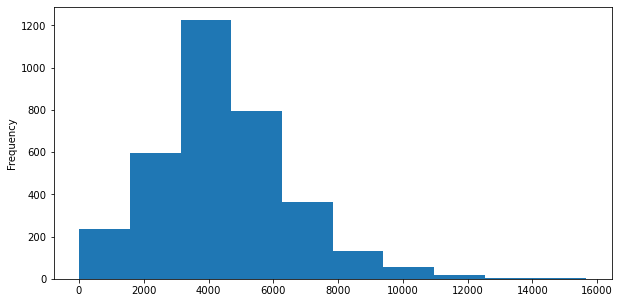

In [714]:
pd.read_csv("ElasticNet.csv")["Selling_Price"].plot(kind = 'hist')

In [643]:
test_X

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Product_id
0,0,0,0,1,0,0,0,0,0,0,0.039733,-1.249895,-0.631719,1.363648,-0.406391,0.945581,-0.424267,-0.837798,SCHE4YSTDVPVZVXW
1,0,0,0,1,0,0,0,0,0,0,-1.150066,0.800067,-0.631719,1.259898,-0.406391,1.048876,-1.053697,-1.221878,ACCEGCATKHNRXUHW
2,0,0,0,0,0,0,0,0,0,1,-0.089849,-1.249895,1.305023,0.153231,-0.406391,1.843457,1.682536,2.593958,NKCE6GJ5XVJDXNNZ
3,1,0,0,0,0,0,0,0,0,0,0.940917,0.800067,2.273394,1.225314,-0.406391,0.333754,0.871241,1.862682,NKCEB8BK3ZXDHDHM
4,0,0,0,0,0,0,0,0,0,1,-0.184091,-1.249895,-0.631719,-0.815103,-0.406391,2.431446,0.259677,-0.032479,TOPEFDXSAHRNPF94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,1,0,0,-0.826111,0.800067,-0.631719,-0.400103,-0.406391,-1.144166,-0.186971,-0.467862,BBAE9K7BXFUTDNBK
3426,0,0,0,0,0,0,0,0,0,1,0.940917,0.800067,2.273394,-1.160936,-0.406391,1.970589,-0.054122,2.147483,RTRDYPA4PJHCJCGF
3427,0,0,1,0,0,0,0,0,0,0,-0.543386,0.800067,-0.631719,-0.503853,-0.406391,-0.881954,-1.279082,1.257029,TUNE8FWQBS7TVVT7
3428,1,0,0,0,0,0,0,0,0,0,-0.555167,0.800067,-0.631719,0.429898,-0.406391,0.508562,-0.927719,-0.331701,NKCEGMUABCRGUZPE


In [661]:
sample_submission = pd.DataFrame()

In [653]:
submission

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [662]:
test_X

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Product_id
0,0,0,0,1,0,0,0,0,0,0,0.039733,-1.249895,-0.631719,1.363648,-0.406391,0.945581,-0.424267,-0.837798,SCHE4YSTDVPVZVXW
1,0,0,0,1,0,0,0,0,0,0,-1.150066,0.800067,-0.631719,1.259898,-0.406391,1.048876,-1.053697,-1.221878,ACCEGCATKHNRXUHW
2,0,0,0,0,0,0,0,0,0,1,-0.089849,-1.249895,1.305023,0.153231,-0.406391,1.843457,1.682536,2.593958,NKCE6GJ5XVJDXNNZ
3,1,0,0,0,0,0,0,0,0,0,0.940917,0.800067,2.273394,1.225314,-0.406391,0.333754,0.871241,1.862682,NKCEB8BK3ZXDHDHM
4,0,0,0,0,0,0,0,0,0,1,-0.184091,-1.249895,-0.631719,-0.815103,-0.406391,2.431446,0.259677,-0.032479,TOPEFDXSAHRNPF94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,1,0,0,-0.826111,0.800067,-0.631719,-0.400103,-0.406391,-1.144166,-0.186971,-0.467862,BBAE9K7BXFUTDNBK
3426,0,0,0,0,0,0,0,0,0,1,0.940917,0.800067,2.273394,-1.160936,-0.406391,1.970589,-0.054122,2.147483,RTRDYPA4PJHCJCGF
3427,0,0,1,0,0,0,0,0,0,0,-0.543386,0.800067,-0.631719,-0.503853,-0.406391,-0.881954,-1.279082,1.257029,TUNE8FWQBS7TVVT7
3428,1,0,0,0,0,0,0,0,0,0,-0.555167,0.800067,-0.631719,0.429898,-0.406391,0.508562,-0.927719,-0.331701,NKCEGMUABCRGUZPE


In [666]:
sample_submission = test_X['Product_id']

In [670]:
 sample_submission=  pd.DataFrame(sample_submission)

In [671]:
sample_submission

,Product_id
0,SCHE4YSTDVPVZVXW
1,ACCEGCATKHNRXUHW
2,NKCE6GJ5XVJDXNNZ
3,NKCEB8BK3ZXDHDHM
4,TOPEFDXSAHRNPF94
...,...
3425,BBAE9K7BXFUTDNBK
3426,RTRDYPA4PJHCJCGF
3427,TUNE8FWQBS7TVVT7
3428,NKCEGMUABCRGUZPE


In [709]:
test_X

,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,Product_id
0,0,0,0,1,0,0,0,0,0,0,0.039733,-1.249895,-0.631719,1.363648,-0.406391,0.945581,-0.424267,-0.837798,SCHE4YSTDVPVZVXW
1,0,0,0,1,0,0,0,0,0,0,-1.150066,0.800067,-0.631719,1.259898,-0.406391,1.048876,-1.053697,-1.221878,ACCEGCATKHNRXUHW
2,0,0,0,0,0,0,0,0,0,1,-0.089849,-1.249895,1.305023,0.153231,-0.406391,1.843457,1.682536,2.593958,NKCE6GJ5XVJDXNNZ
3,1,0,0,0,0,0,0,0,0,0,0.940917,0.800067,2.273394,1.225314,-0.406391,0.333754,0.871241,1.862682,NKCEB8BK3ZXDHDHM
4,0,0,0,0,0,0,0,0,0,1,-0.184091,-1.249895,-0.631719,-0.815103,-0.406391,2.431446,0.259677,-0.032479,TOPEFDXSAHRNPF94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,0,0,0,0,0,0,0,1,0,0,-0.826111,0.800067,-0.631719,-0.400103,-0.406391,-1.144166,-0.186971,-0.467862,BBAE9K7BXFUTDNBK
3426,0,0,0,0,0,0,0,0,0,1,0.940917,0.800067,2.273394,-1.160936,-0.406391,1.970589,-0.054122,2.147483,RTRDYPA4PJHCJCGF
3427,0,0,1,0,0,0,0,0,0,0,-0.543386,0.800067,-0.631719,-0.503853,-0.406391,-0.881954,-1.279082,1.257029,TUNE8FWQBS7TVVT7
3428,1,0,0,0,0,0,0,0,0,0,-0.555167,0.800067,-0.631719,0.429898,-0.406391,0.508562,-0.927719,-0.331701,NKCEGMUABCRGUZPE


In [672]:
sample_submission['Selling_Price'] = np.na

In [ ]:
sample_submission

In [ ]:
test1

In [710]:
res = []
for i in range(1,25):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fit(model,train_X, train_y, test_X.drop(columns='Product_id'), sample_submission, str(i)+"KNN.csv")
    res.append(err)

1
Train RMSE :  399.4633730970382
2
Train RMSE :  507.6993292134007
3
Train RMSE :  583.8424106705738
4
Train RMSE :  631.7788040813646
5
Train RMSE :  656.5704048819015
6
Train RMSE :  676.1457276924571
7
Train RMSE :  693.1276267109052
8
Train RMSE :  710.4269507729914
9
Train RMSE :  721.8855728296144
10
Train RMSE :  734.5363131170144
11
Train RMSE :  741.1399609150844
12
Train RMSE :  751.9463504098562
13
Train RMSE :  759.1314466836101
14
Train RMSE :  768.1406921408843
15
Train RMSE :  773.4770729201695
16
Train RMSE :  782.4866537203543
17
Train RMSE :  788.3802099567803
18
Train RMSE :  795.3200246340399
19
Train RMSE :  802.2729832464343
20
Train RMSE :  807.3514248044002
21
Train RMSE :  811.265091044269
22
Train RMSE :  817.9069451246567
23
Train RMSE :  821.1819757279958
24
Train RMSE :  825.3910883823045


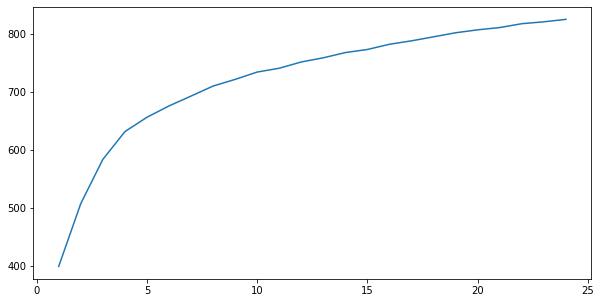

In [711]:
plt.plot(range(1,25),res)